In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
plt.rcParams['text.usetex'] = True

<>:58: SyntaxWarning: invalid escape sequence '\e'
<>:58: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_125564/530847229.py:58: SyntaxWarning: invalid escape sequence '\e'
  plot_spectrum(axs[4, 1], freq, eps_spec, "Frequency Spectrum ($\epsilon_n$)")


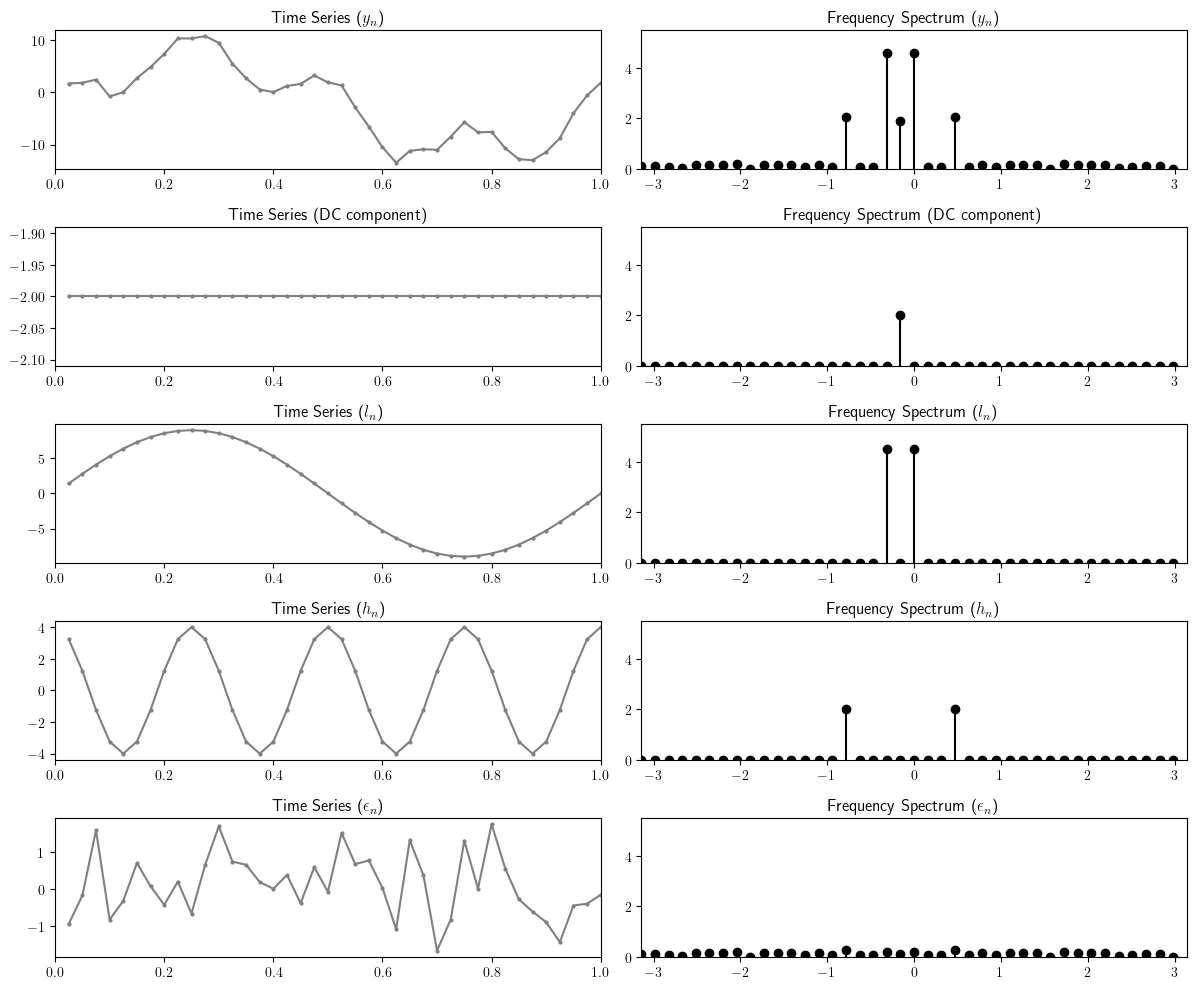

In [3]:
# Define the function to compute the Fourier Transform and spectra
def spec(y):
    n = len(y)
    spec = np.abs(fft(y)) / n
    omega = np.arange(n) / n
    if n % 2 == 0:
        m = (n // 2) + 1
    else:
        m = (n - 1) // 2 + 1
    spec = np.concatenate((spec[m:], spec[:m]))
    omega = np.concatenate((omega[m:] - 1, omega[:m])) - 1 / n
    return omega * 2 * np.pi, spec

# Define the time series
t = np.arange(1, 41) / 40
eps = np.random.normal(size=40)
const = -2 + t * 0
low = 9 * np.sin(2 * np.pi * t)
high = 4 * np.cos(4 * 2 * np.pi * t)
ytrue = const + low + high
y = ytrue + eps

# Compute spectra
freq, y_spec = spec(y)
_, const_spec = spec(const)
_, low_spec = spec(low)
_, high_spec = spec(high)
_, eps_spec = spec(eps)

# Plotting
fig, axs = plt.subplots(5, 2, figsize=(12, 10))

# Time series and their spectra
def plot_series(ax, t, series, title=""):
    ax.plot(t, series, 'gray', marker='o', markersize=2)
    ax.set_title(title)
    ax.set_xlim(0, 1)  # Setting x-axis limits

def plot_spectrum(ax, freq, spectrum, title=""):
    ax.stem(freq, spectrum, 'k-', basefmt=" ", markerfmt='ko')
    ax.set_ylim(0, 5.5)
    ax.set_xlim(-np.pi, np.pi)  # Setting x-axis limits for frequency
    ax.set_title(title)

plot_series(axs[0, 0], t, y, "Time Series ($y_n$)")
plot_spectrum(axs[0, 1], freq, y_spec, "Frequency Spectrum ($y_n$)")

plot_series(axs[1, 0], t, const, "Time Series (DC component)")
plot_spectrum(axs[1, 1], freq, const_spec, "Frequency Spectrum (DC component)")

plot_series(axs[2, 0], t, low, "Time Series ($l_n$)")
plot_spectrum(axs[2, 1], freq, low_spec, "Frequency Spectrum ($l_n$)")

plot_series(axs[3, 0], t, high, "Time Series ($h_n$)")
plot_spectrum(axs[3, 1], freq, high_spec, "Frequency Spectrum ($h_n$)")

plot_series(axs[4, 0], t, eps, r"Time Series ($\epsilon_n$)")
plot_spectrum(axs[4, 1], freq, eps_spec, "Frequency Spectrum ($\epsilon_n$)")

plt.tight_layout()